In [234]:
# calling all the required libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [235]:
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [236]:
data.shape

(1599, 12)

In [237]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [238]:
#checking null value
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [239]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [240]:
#observation
##we see some drastic changes in fixed acidity,residual suger,free sulphur dioxide,total sulphur dioxide values between 75% and max.

<AxesSubplot:>

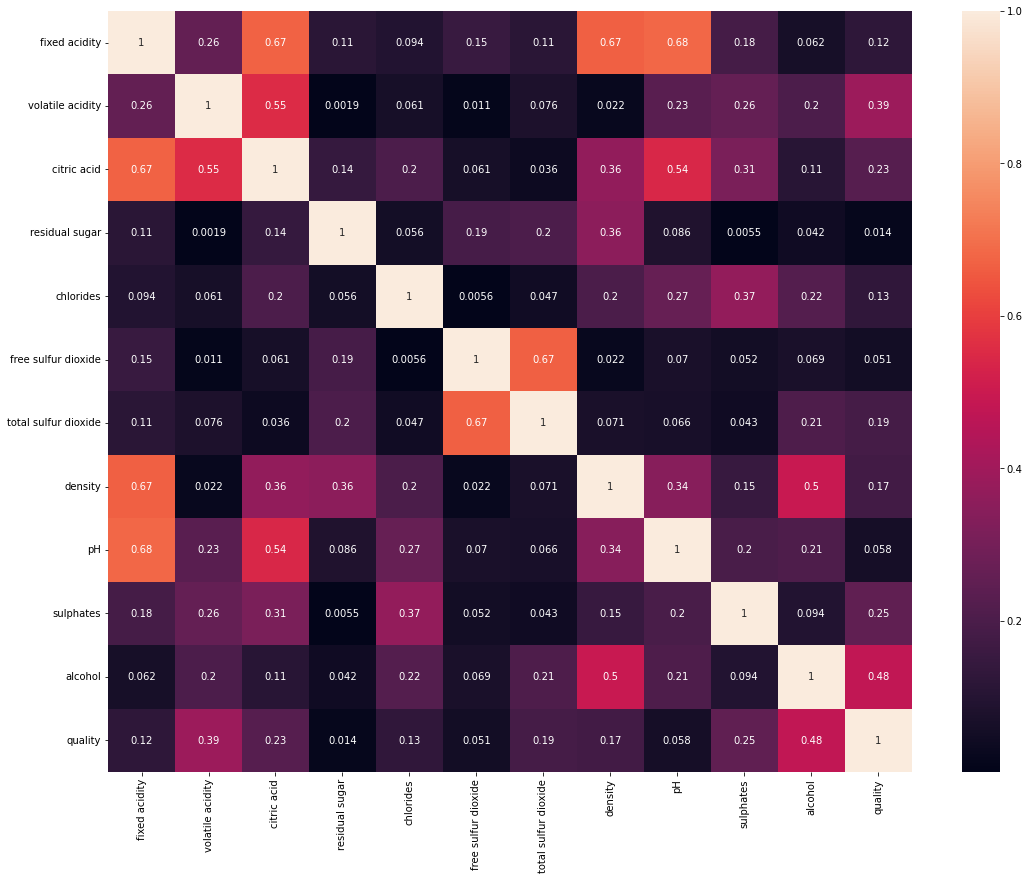

In [241]:
#establising relationship among features anf label.
### plotting heatmap to check correlation

df_corr = data.corr().abs()
plt.figure(figsize=(18,14))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})

In [242]:
#observation for the below plot
#we see some skewness in the graph like alcohal,total sulphur dioxide,free sulphur oxide,chlorides,residual suger etc
#may be outliers present in residualsuger,chlorides etc

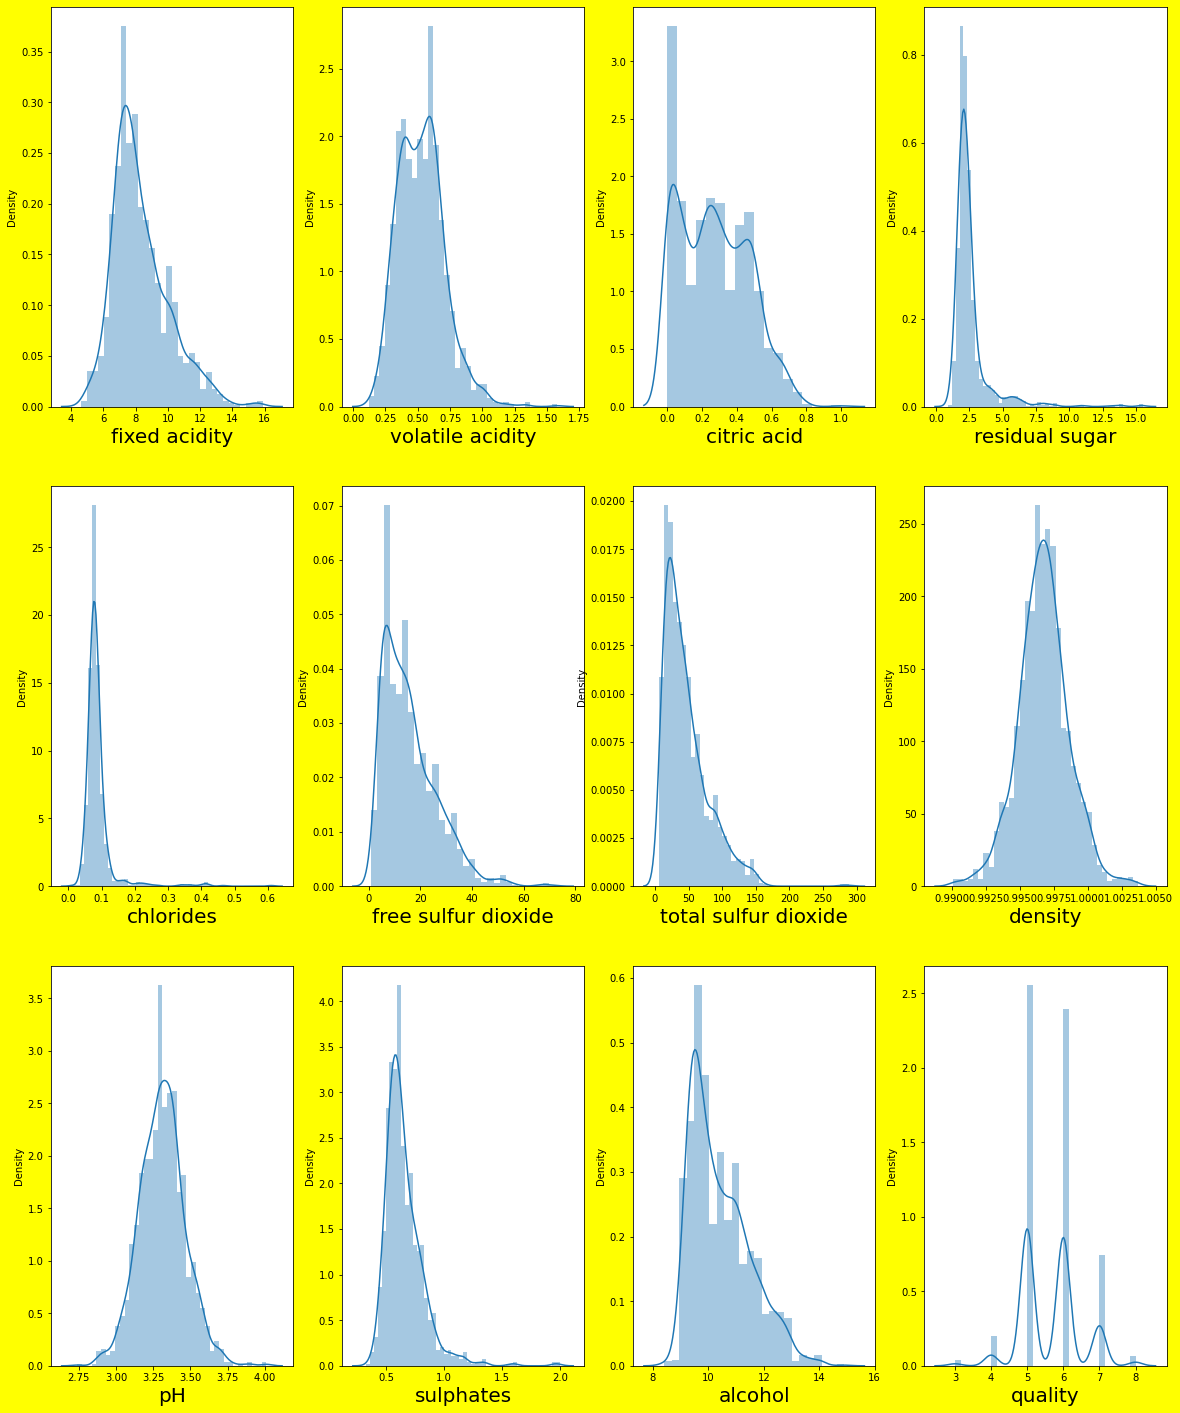

In [243]:
plt.figure(figsize=(20,25),facecolor="yellow")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [244]:
df_features=data.drop('quality',axis=1)

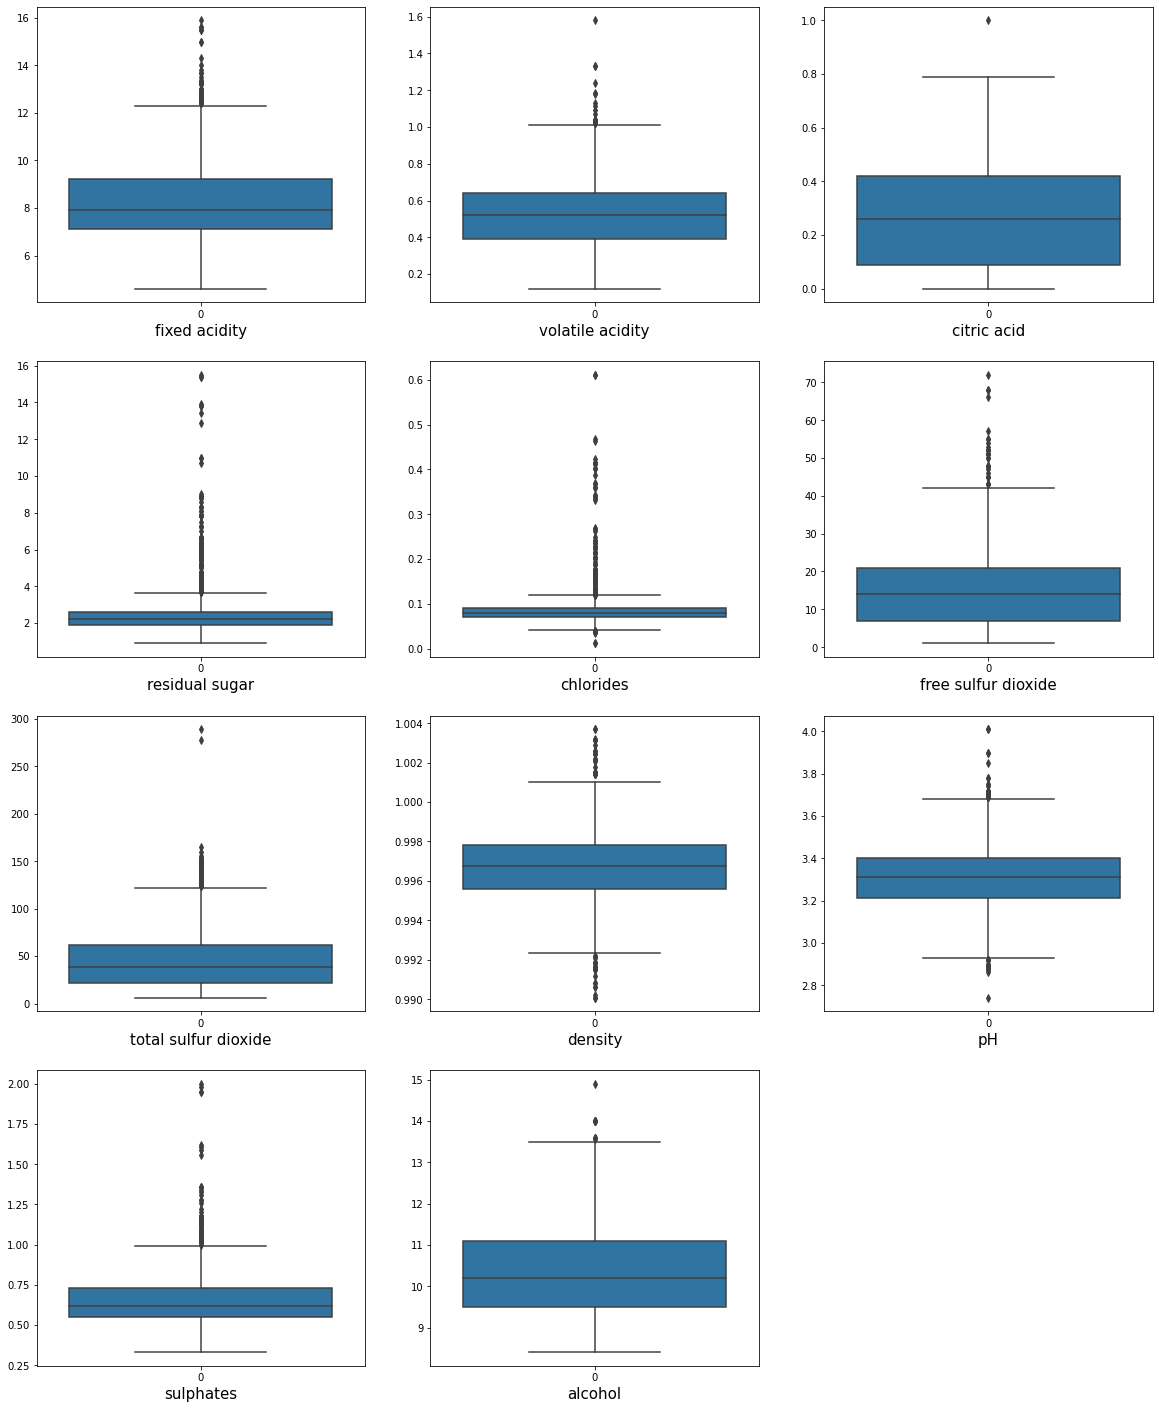

In [245]:
#using boxplot to remove outliers

plt.figure(figsize=(20,25))
graph = 1
for column in df_features:
    if graph<=12:
        plt.subplot(4,3,graph)
        ax=sns.boxplot(data=df_features[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()


observation== in the box plot we see many outliers which we have to remove

In [246]:
data.shape

(1599, 12)

# FINDING IQR TO IDENTIFY OUTLIERS

In [247]:
header_data = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','Chlorides','free_sulfur_dioxide','total_sulfur_dioxide','Density','pH','sulphates','alcohol','quality']
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv',header=None,skiprows=1,names=header_data)

In [248]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [249]:
data.shape

(1599, 12)

In [250]:
q1 = data.quantile(.25)
q3 = data.quantile(.75)
iqr = q3-q1

In [251]:
fixed_acid = (q3.fixed_acidity + (1.5*iqr.fixed_acidity))
fixed_acid

12.349999999999998

In [252]:
index = np.where(data['fixed_acidity']>fixed_acid)
index

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224], dtype=int64),)

In [253]:
data = data.drop(data.index[index])
data.shape

(1550, 12)

In [254]:
data.reset_index().head()

,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [255]:
volatile_acid = (q3.volatile_acidity + (1.5*iqr.volatile_acidity))
print('volatile_acid')
index = np.where(data['volatile_acidity']>volatile_acid)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()



volatile_acid
(1531, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [256]:
citric_acid = (q3.citric_acid + (1.5*iqr.citric_acid))
print('citric_acid')
index = np.where(data['citric_acid']>citric_acid)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

citric_acid
(1530, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [257]:
residual_sugar = (q3.residual_sugar + (1.5*iqr.residual_sugar))
print('residual_sugar')
index = np.where(data['residual_sugar']>residual_sugar)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

residual_sugar
(1392, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [258]:
Chlorides = (q3.Chlorides + (1.5*iqr.Chlorides))
print('Chlorides')
index = np.where(data['Chlorides']>Chlorides)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

Chlorides
(1311, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [259]:
Chlorides = (q1.Chlorides - (1.5*iqr.Chlorides))
print('Chlorides')
index = np.where(data['Chlorides']<Chlorides)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

Chlorides
(1302, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [260]:
free_sulfur_dioxide = (q3.free_sulfur_dioxide + (1.5*iqr.free_sulfur_dioxide))
print('free_sulfur_dioxide')
index = np.where(data['free_sulfur_dioxide']>free_sulfur_dioxide)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

free_sulfur_dioxide
(1286, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [261]:
total_sulfur_dioxide = (q3.total_sulfur_dioxide + (1.5*iqr.total_sulfur_dioxide))
print('total_sulfur_dioxide')
index = np.where(data['total_sulfur_dioxide']>total_sulfur_dioxide)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

total_sulfur_dioxide
(1250, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [262]:
Density = (q3.Density + (1.5*iqr.Density))
print('Density')
index = np.where(data['Density']>Density)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

Density
(1250, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [263]:
Density = (q1.Density - (1.5*iqr.Density))
print('Density')
index = np.where(data['Density']<Density)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

Density
(1235, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [264]:
pH = (q3.pH + (1.5*iqr.pH))
print('pH')
index = np.where(data['pH']>pH)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

pH
(1220, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [265]:
pH = (q1.pH - (1.5*iqr.pH))
print('pH')
index = np.where(data['pH']<pH)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

pH
(1216, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [266]:
sulphates = (q3.sulphates + (1.5*iqr.sulphates))
print('sulphates')
index = np.where(data['sulphates']>sulphates)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

sulphates
(1196, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [267]:
alcohol = (q3.alcohol + (1.5*iqr.alcohol))
print('alcohol')
index = np.where(data['alcohol']>alcohol)
data = data.drop(data.index[index])

print(data.shape)
data.reset_index().head()

alcohol
(1194, 12)


,index,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


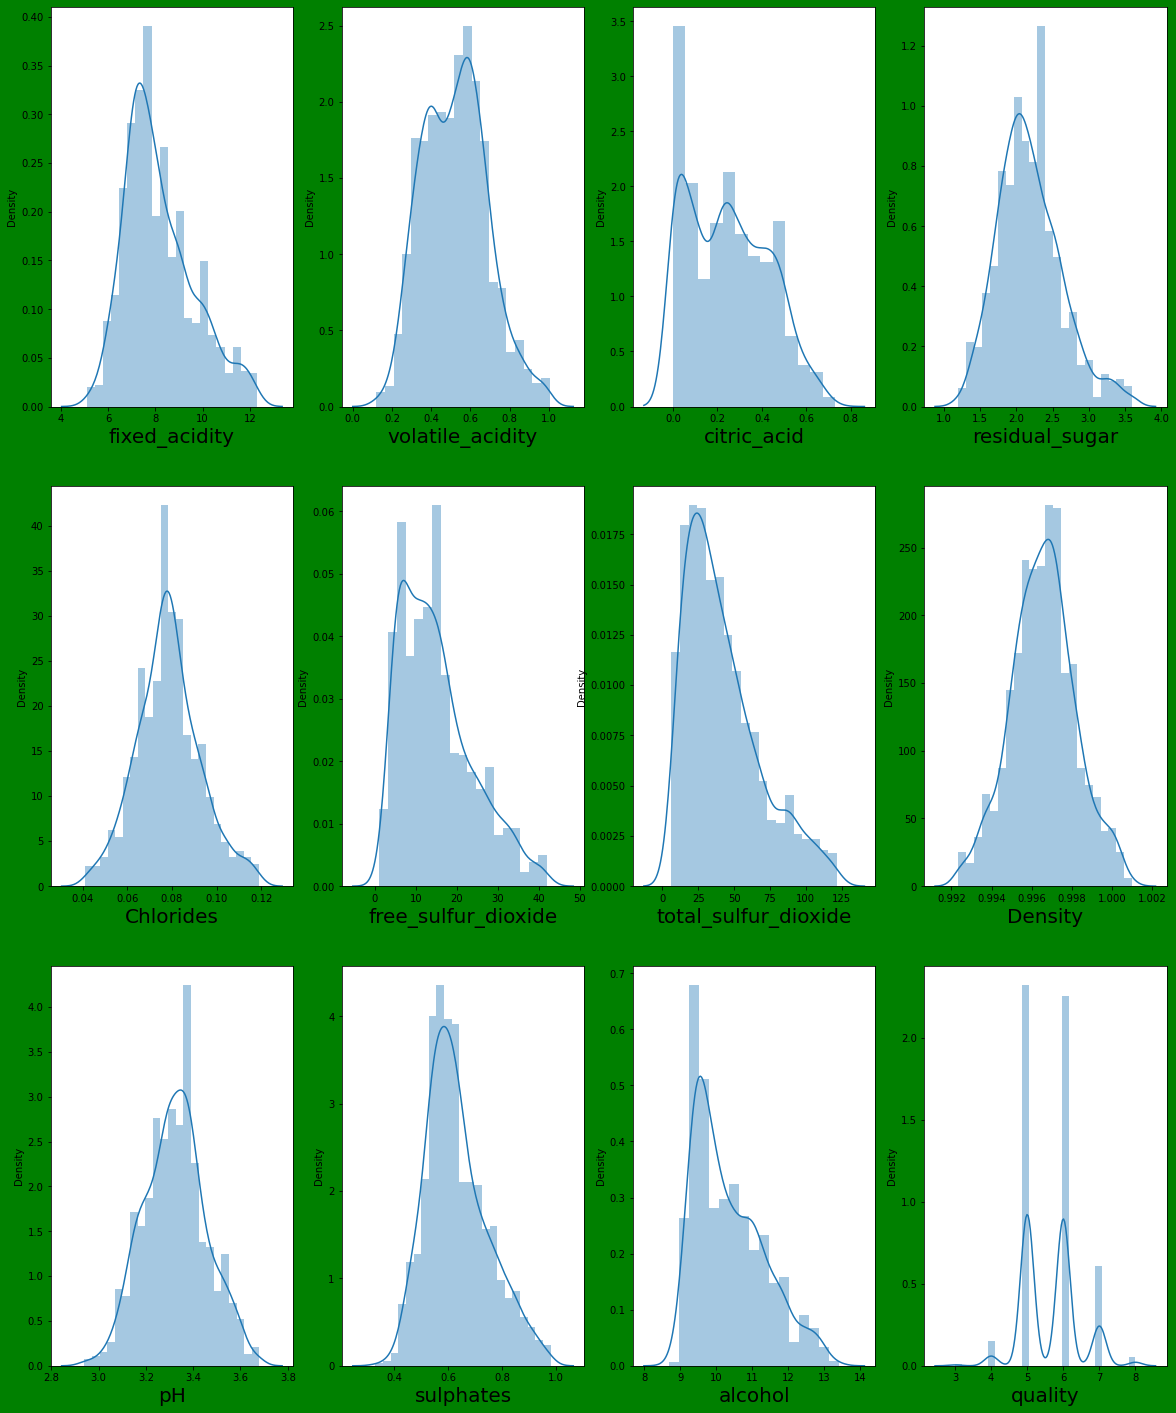

In [268]:
#data distribution
plt.figure(figsize=(20,25),facecolor="green")
plotnumber=1
for column in data:
    if plotnumber<=12:
        ax = plt.subplot(3,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()



In [269]:
#observation
## all the positive and negative outliers are removed and plot looks much better in normal distribution.

# Preprocessing Data for performing Machine learning algorithms

In [270]:
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [271]:
label_quality = LabelEncoder()

In [272]:
#Bad becomes 0 and good becomes 1 
data['quality'] = label_quality.fit_transform(data['quality'])

In [273]:
data['quality'].value_counts()

0    1047
1     147
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

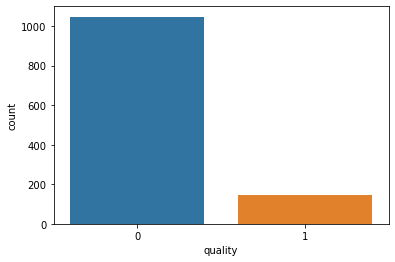

In [274]:
sns.countplot(data['quality'])

In [275]:
X = data.drop(columns=['quality'])
y = data['quality']

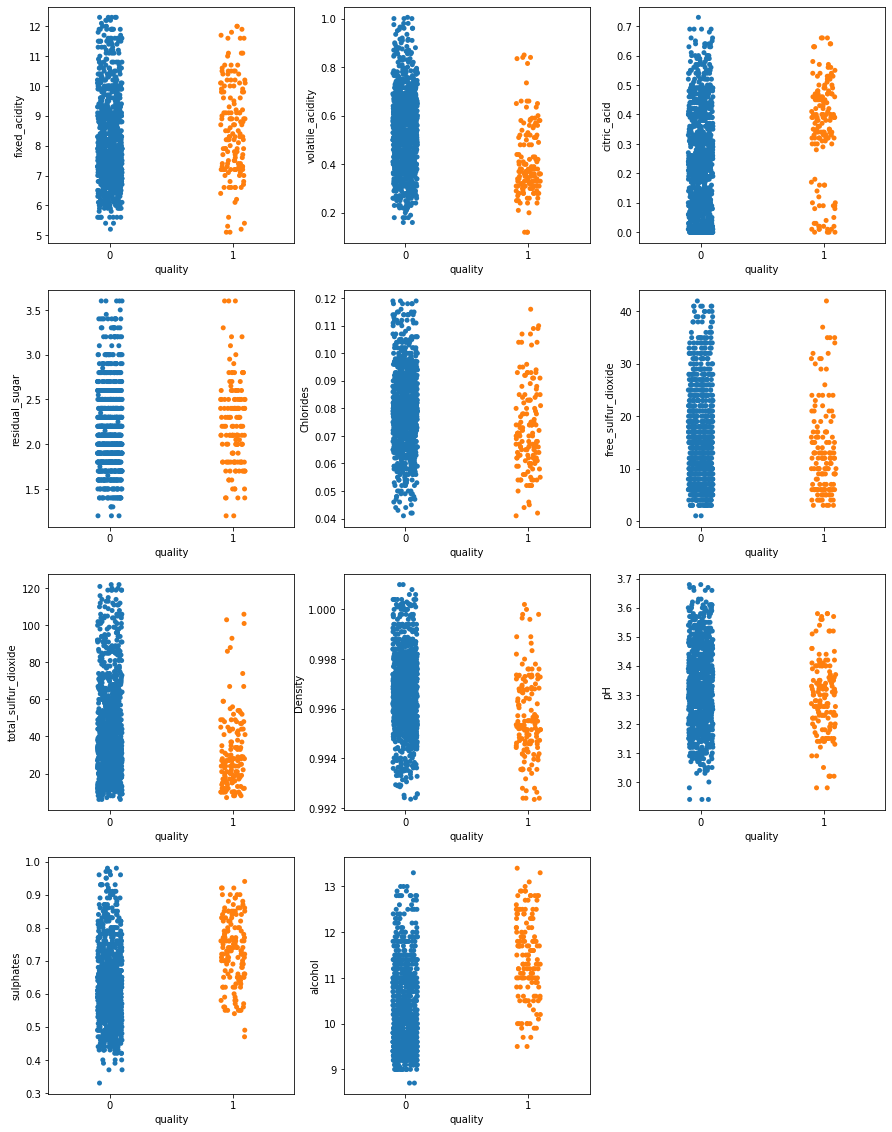

In [276]:
#relationship between independent variables and their categories

plt.figure(figsize = (15,20))
plotnumber = 1

for column in X:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.stripplot(y,X[column])
    plotnumber+=1
plt.show()

In [277]:
#checking multicollinearity

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [278]:
##now applying VIF...

In [279]:
X_scaled.shape

(1194, 11)

In [280]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [281]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['Features'] = X.columns
vif

,vif,Features
0,6.796263,fixed_acidity
1,2.032933,volatile_acidity
2,3.139208,citric_acid
3,1.718704,residual_sugar
4,1.295224,Chlorides
5,1.813119,free_sulfur_dioxide
6,2.039186,total_sulfur_dioxide
7,6.703952,Density
8,3.089825,pH
9,1.324893,sulphates


# observation = as vif value is more than 5 for fixed_acidity and density multicollinearity may exists.so we may drop them

In [284]:
data = data.drop(columns = ['fixed_acidity'])
data.head()

,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,Density,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [285]:
data = data.drop(columns = ['Density'])
data.head()

,volatile_acidity,citric_acid,residual_sugar,Chlorides,free_sulfur_dioxide,total_sulfur_dioxide,pH,sulphates,alcohol,quality
0,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0
1,0.88,0.00,2.6,0.098,25.0,67.0,3.20,0.68,9.8,0
2,0.76,0.04,2.3,0.092,15.0,54.0,3.26,0.65,9.8,0
3,0.28,0.56,1.9,0.075,17.0,60.0,3.16,0.58,9.8,0
4,0.70,0.00,1.9,0.076,11.0,34.0,3.51,0.56,9.4,0


In [286]:
X_scaled.shape

(1194, 11)

In [287]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = .25,random_state=455)

# LOGISTIC REGRESSION

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [291]:
y_pred = log_reg.predict(x_test)

In [292]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# CHECKING MODEL ACCURACY

In [293]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9063545150501672

# CONFUSION MATRIX

In [294]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[260,   6],
       [ 22,  11]], dtype=int64)

# recall/precision/F1 score

In [296]:
from sklearn.metrics import classification_report

In [297]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       266
           1       0.65      0.33      0.44        33

    accuracy                           0.91       299
   macro avg       0.78      0.66      0.69       299
weighted avg       0.89      0.91      0.89       299



# ROC CURVE

In [298]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [299]:
print('threshold =',thresholds)
print('True positive rate=',tpr)
print('false positive rate',fpr)
      

threshold = [2 1 0]
True positive rate= [0.         0.33333333 1.        ]
false positive rate [0.         0.02255639 1.        ]


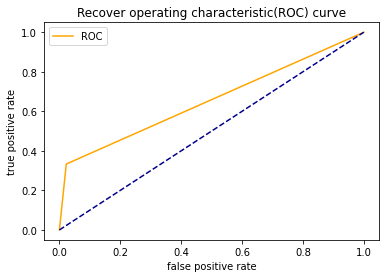

In [300]:
plt.plot(fpr,tpr,color="orange",label="ROC")
plt.plot([0,1],[0,1],color='darkblue',linestyle='--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Recover operating characteristic(ROC) curve')
plt.legend()
plt.show()

In [301]:
auc_score = roc_auc_score(y_test,y_pred)
print(auc_score)

0.6553884711779449


# RANDOM FOREST CLASSIFIER

In [303]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
pred_rfc = rfc.predict(x_test)

In [304]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       266
           1       0.83      0.45      0.59        33

    accuracy                           0.93       299
   macro avg       0.88      0.72      0.77       299
weighted avg       0.92      0.93      0.92       299



# Stochastic Gradient Decent Classifier

In [305]:
sgd = SGDClassifier(penalty=None)
sgd.fit(x_train, y_train)
pred_sgd = sgd.predict(x_test)

In [306]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       266
           1       0.48      0.45      0.47        33

    accuracy                           0.89       299
   macro avg       0.71      0.70      0.70       299
weighted avg       0.88      0.89      0.88       299



# KNN CLASSIFIERS

In [309]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

In [313]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_test,y_test)

0.9096989966555183

# BAGGING THE KNN

In [314]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=.07,bootstrap=True,random_state=3,oob_score=True)

In [315]:
bag_knn.fit(x_train,y_train)
bag_knn.score(x_test,y_test)

0.903010033444816

In [318]:
pasting_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),n_estimators=9,max_samples=.07,bootstrap=False,random_state=3,oob_score=False)

In [319]:
pasting_knn.fit(x_train,y_train)
pasting_knn.score(x_test,y_test)

0.8929765886287625

# DECISION TREE CLASSIFIER

In [325]:
clf = DecisionTreeClassifier()

In [326]:
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [327]:
clf.score(x_train,y_train)

1.0

In [328]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9063545150501672

# Support Vector Classifier

In [307]:
svc = SVC()
svc.fit(x_train, y_train)
pred_svc = svc.predict(x_test)

In [308]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       266
           1       0.78      0.21      0.33        33

    accuracy                           0.91       299
   macro avg       0.84      0.60      0.64       299
weighted avg       0.90      0.91      0.88       299



# Trying to boost the model

Grid Search CV

In [320]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [321]:
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [322]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.1, 'gamma': 0.8, 'kernel': 'rbf'}

In [324]:
svc2 = SVC(C = 1.1, gamma =  0.8, kernel= 'rbf')
svc2.fit(x_train, y_train)
pred_svc2 = svc2.predict(x_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96       266
           1       1.00      0.33      0.50        33

    accuracy                           0.93       299
   macro avg       0.96      0.67      0.73       299
weighted avg       0.93      0.93      0.91       299



# observation===significant improvement in accuracy after boosting..96% accuracy

Cross Validation Score for random forest and SGD

In [332]:
rfc_accu = cross_val_score(estimator = rfc, X = x_train, y = y_train, cv = 10)
rfc_accu.mean()

0.9195255930087392

# ROC-AUC CURVE

In [338]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()


In [339]:
lr.fit(x_train,y_train)
dt.fit(x_train,y_train)
rf.fit(x_train,y_train)
kn.fit(x_train,y_train)
print('All models are trained')

All models are trained


In [340]:
lr.score(x_test,y_test)
dt.score(x_test,y_test)
rf.score(x_test,y_test)
kn.score(x_test,y_test)
print("All model tets captured")

All model tets captured


In [341]:
from sklearn.metrics import plot_roc_curve

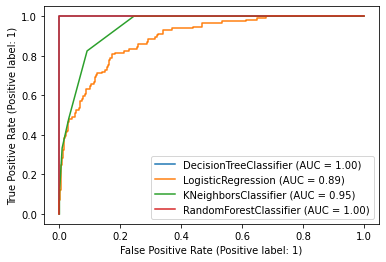

In [346]:
disp = plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(lr,x_train,y_train,ax=disp.ax_)
plot_roc_curve(kn,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train,ax=disp.ax_)
plt.legend(prop={'size':10},loc="lower right")
plt.show()


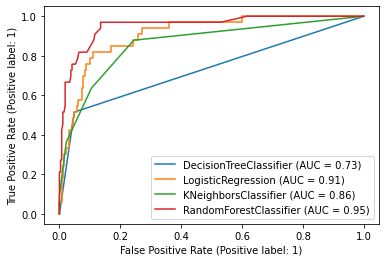

In [347]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(lr,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)
plt.legend(prop={'size':10},loc="lower right")
plt.show()